In [2]:
import pandas as pd
import statsmodels.api as sm

### Загружаем данные

In [3]:
item = 'TravelMode' # Выбрать из поля Item для вашего датасета
package = 'AER' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

individual   mode choice  wait  vcost  travel  gcost  income  size
0           1    air     no    69     59     100     70      35     1
1           1  train     no    34     31     372     71      35     1
2           1    bus     no    35     25     417     70      35     1
3           1    car    yes     0     10     180     30      35     1
4           2    air     no    64     58      68     68      30     2

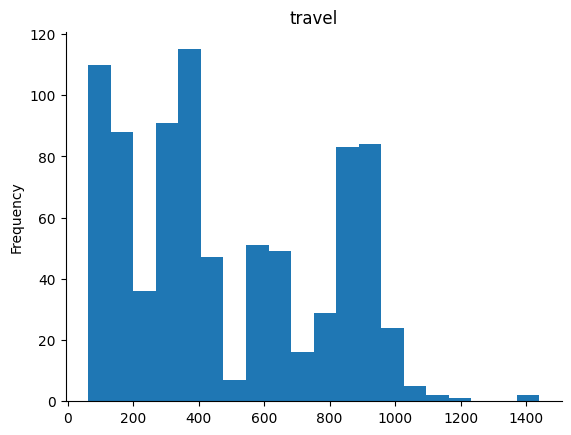

In [6]:
# @title travel

from matplotlib import pyplot as plt
df['travel'].plot(kind='hist', bins=20, title='travel')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Далее идет ваше решение

Задание 1

TravelMode содержит данные о выборе способа передвижения между Сиднеем и Мельбурном, Австралия.

840 наблюдений по 4 модам для 210 человек.

individual - Фактор, указывающий на индивидуума с уровнями 1 до 210.

mode - Фактор, указывающий режим движения с уровнями "car", "air", "train", или "bus".

choice - Фактор, указывающий выбор с уровнями "no"и "yes".

wait - Время ожидания на терминале: 0 для автомобиля.

vcost - Составляющая стоимости транспортного средства.

travel - Время в пути на транспортном средстве.

gcost - Обобщенная мера стоимости.

income - Доход домохозяйства.

size - Размер партии.

Задание 2-7

а) переменные mode и choice взаимосвязаны выбором, один не может существовать без другого. Например, в столбце mode перечислены виды транспорта для передвижения, в choice указано предпочтение: да или нет. Существование показателя популярности и предпочтения зависит от того, заполнены столбцы mode и choice. По выведенной таблице уже можно прийти к выводу, что фактор "yes" есть только у фактора "car". Следовательно, "car" не входит в одну группу с "air", "train", "bus". Поэтому благодаря заполненности столбца choice данные в столбце mode можно сгруппировать по указанным признакам, в данном случае по "yes" и "no".  Из общеизвестных фактов можно предпололжить, что данную группировку можно расшифровать как общественный транспорт и индивидуальный. Помимо этого, можно также предположить, что люди больше предпочитают индивидуальный транспорт, чем общественный. Вероятно, на общественном транспорте сложнее передвигаться между Сиднеем и Мельбруном. Для визуального понимания рассмотрим на карте данные города.

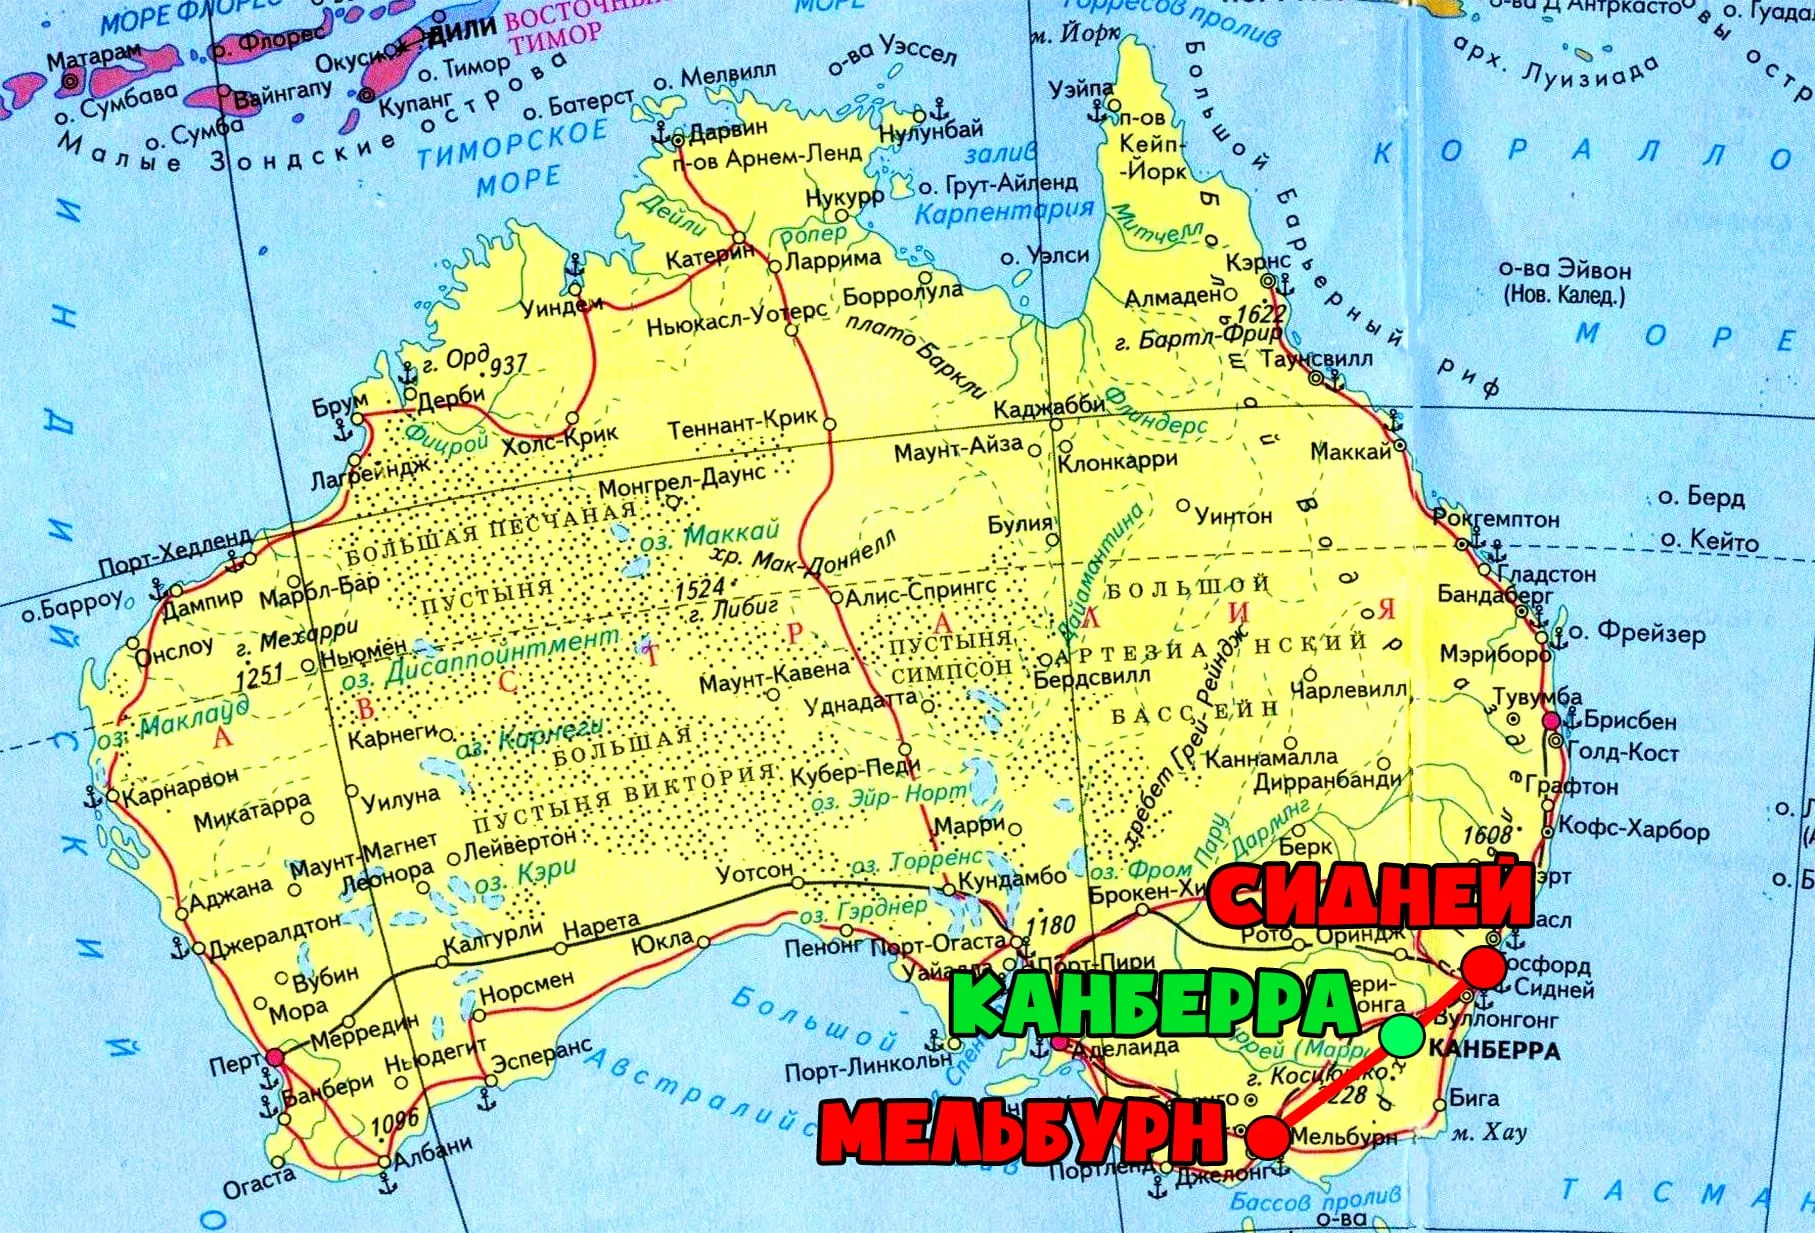

б) рассмотрим взаимосвязь mode и travel. Из описания приведённого выше нам известно, что в столбце travel указано время передвижения на транспорте. Исследуем более подробно каждый транспорт.
*   Air - 100
*   Train - 372
*   Bus - 417
*   Car - 180

Из приведенных выше значений можно прийти к выводу, что на самолёте добираться быстрее всего. Но из анализа выше мы помним, что предпочтение всё же больше отдаётся индивидуальному транспорту. На автобусе добираться дольше всего. По общеизвестным фактам мы знаем, что по скорости автобус уступает поезду, не смотря на то, что время передвижения на поезде и автобусе различается всего на 45. Поэтому благодаря взаимосвязи данным переменным мы можем узнать, сколько времени затратится на передвижения на конкретном виде транспорта.







в) взаимосвязь числовых переменных рассмотрим на примере столбцов wait и travel.
И тот и другой столбец характеризует время. В случае wait показывает время ожидания на терминале, в случае travel показывает время передвижения на определённом виде транспорта. При изучении описания wait мы уже знаем, что для индивидуального транспорта время ожидания равно 0. Поэтому сравним время ожидания у общественного вида транспорта, но не самого вида, а времени затраченного на передвижение с помощью этого транспорта.

*   69 - 100
*   34 - 372
*   35 - 417
*   0 - 180

Проведём эксперимент и просуммируем время для каждого вида транспорта.

*   69 + 100 = 169
*   34 + 372 = 406
*   35 + 417 = 452
*   0 + 180 = 180

Для чего был проведём этот эксперимент? Для того, чтобы узнать насколько повлияет время ожидания при выборе определённого вида транспорта. Допустим, мы знаем, что время перелёта на самолёте составляет 100. Но время ожидания на терминале равно 69. Следовательно, в сумме человек потратит 169 времени выбирая вид транспорта самолёт. Сравнивая, сумму затраченного времени передвижения на самолёте и машине, разница составляет 11. Возможно, поэтому люди предпочитают больше общественный транспорт, так как в реальности время ожидания на терминале плюс-минус может измениться в невыгодную для пассажира сторону. Анализируя время ожидания автобуса и поезда, можно прийти к выводу, что ожидание примерно одинаковое, следовательно, при суммировании не слишкои сильно изменяет показатели времени, поэтому затраченное время в совокупности остаётся в том же проценте разницы. На автобусе по-прежнему добираться дольше всего.







3) коротко о логическом смысле. Данная взаимосвязь не то, чтобы должна существовать она уже существует. И в реальности люди её использует, вероятно, даже этого не замечая. Если человека посмотрим на показатель выбора, что предпочитают больше общественный транспорт или индивидуальный, то вероятнее всего в силу вступит принцип большинства. И если человек будет знать, что в большинстве случаев люди предпочитают между Сиднеем и Мельбурном добираться на индивидуальном транспорте, то вероятнее всего выбирут индивидуальный транспорт, но только конечно, если у них такой есть. Если индивидуального транспорта нет, то в помощь придёт взаимосвязь категориальной и числовой или числовой и числовой переменных. Зная время передвижения, человек может для себя выбрать, какой из общественных транспортов ему выбрать. Хочет ли он добраться, как можно быстрее, или хочет насладиться длительным путешествием, например, если человек писатель и любит сидя, в поезде или в атобусе, глядя в окно, сочинять различные истории. Взаимосвязь времения передвижения и времени ожидания даст человеку ответ, сколько времени он согласен провести на терминале. На самолёте время ожидания больше всего, а время передвижения меньше. Поэтому в дальнейшем я ожидаю, что на данную взаимосвязь использовать не только на интуитивном уровне, но и ещё и логически осознавать, что в нашем мире присутствуют закономерности.

4) Построим график, который наглядно демонстрирует время передвижения каждого вида транспорта и время ожидания на терминале во время путешествия между Сиднеем и Мельбруном.

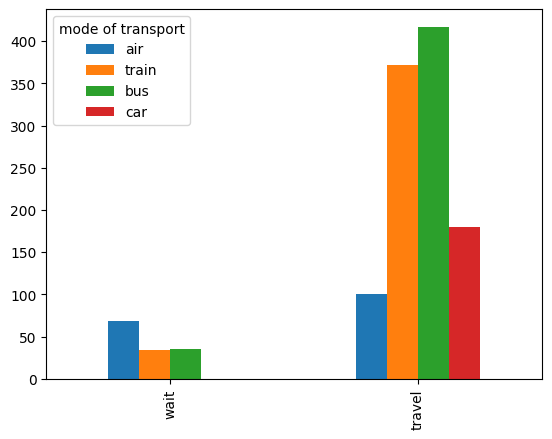

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'mode of transport': ['air', 'train', 'bus', 'car'],
    'wait': [69, 34, 35, 0],
    'travel': [100, 372, 417, 180]
})

df.set_index('mode of transport').T.plot(kind='bar')
plt.show()

По результатам графика видно, что больше всего времени затрачивается используя для передвижения автобус и меньше всего времения затрачивается используя самолёт. Также видно, что время ожидания на термринале автобуса и поезда практически одинаково.

Вывод: Данный анализ можно использовать для определения вида транспорта при планировании путешествия между Сиднеем и Мельбруном, где основным критерием выбора того или иного транспрота будет являться время.